<a href="https://colab.research.google.com/github/laracrofty-boss/AI_PO_GRN_Matching-/blob/main/AI_PO_GRN_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of sample transactions
num_samples = 200

# Generate random PO quantities (between 50 and 500 units)
po_qty = np.random.randint(50, 500, num_samples)

# Generate GRN quantities (simulate small mistakes)
grn_qty = po_qty + np.random.choice([0, -5, 0, 5, 0], size=num_samples)

# Generate Invoice quantities (simulate errors or fraud)
invoice_qty = grn_qty + np.random.choice([0, 0, 0, 10, -10], size=num_samples)

# Determine status: MATCH if PO == GRN == Invoice, else MISMATCH
status = ["MATCH" if (po_qty[i] == grn_qty[i] == invoice_qty[i]) else "MISMATCH"
          for i in range(num_samples)]

# Create DataFrame
df = pd.DataFrame({
    "PO_Qty": po_qty,
    "GRN_Qty": grn_qty,
    "Invoice_Qty": invoice_qty,
    "Status": status
})

# Show the first few rows
df.head()


,PO_Qty,GRN_Qty,Invoice_Qty,Status
0,152,157,157,MISMATCH
1,485,490,490,MISMATCH
2,398,398,398,MATCH
3,320,315,315,MISMATCH
4,156,161,151,MISMATCH


In [3]:
# Import libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare features (PO, GRN, Invoice quantities)
X = df[["PO_Qty", "GRN_Qty", "Invoice_Qty"]]

# Prepare target variable (Status)
y = df["Status"]

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy*100, 2), "%")

# Show confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 50.0 %

Confusion Matrix:
[[ 4 11]
 [ 9 16]]


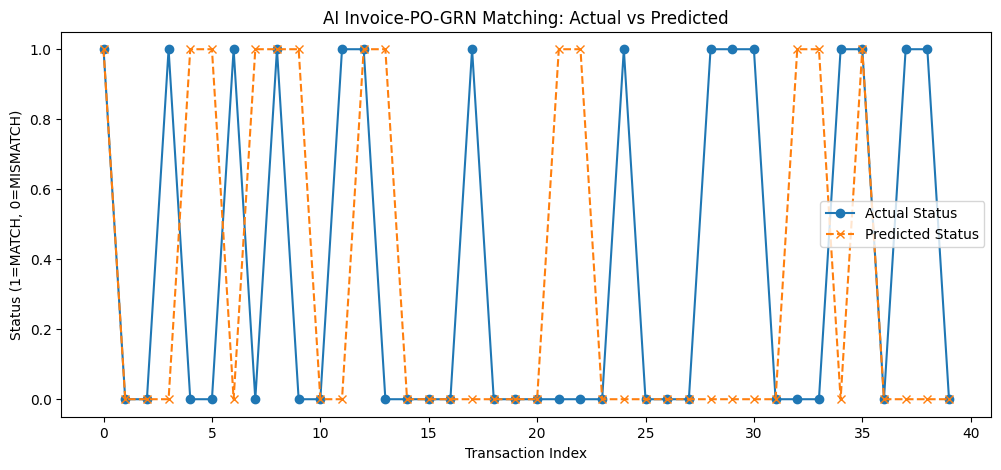

In [4]:
import matplotlib.pyplot as plt

# Reset index for plotting
y_test = y_test.reset_index(drop=True)

# Map MATCH/MISMATCH to numeric for plotting
y_test_num = y_test.map({"MATCH": 1, "MISMATCH": 0})
y_pred_num = pd.Series(y_pred).map({"MATCH": 1, "MISMATCH": 0})

plt.figure(figsize=(12,5))
plt.plot(y_test_num, marker='o', label="Actual Status")
plt.plot(y_pred_num, marker='x', linestyle='--', label="Predicted Status")
plt.title("AI Invoice-PO-GRN Matching: Actual vs Predicted")
plt.xlabel("Transaction Index")
plt.ylabel("Status (1=MATCH, 0=MISMATCH)")
plt.legend()
plt.show()


In [5]:
import joblib

# Save the trained model to a file
joblib.dump(model, "invoice_match_model.pkl")

print("Model saved successfully as 'invoice_match_model.pkl'")


Model saved successfully as 'invoice_match_model.pkl'


In [6]:
# Example: new transactions to test
new_transactions = pd.DataFrame({
    "PO_Qty": [100, 250, 400],
    "GRN_Qty": [100, 245, 400],
    "Invoice_Qty": [100, 245, 450]
})

# Predict using the trained model
predictions = model.predict(new_transactions)

# Show the results
new_transactions["Predicted_Status"] = predictions
new_transactions


,PO_Qty,GRN_Qty,Invoice_Qty,Predicted_Status
0,100,100,100,MATCH
1,250,245,245,MISMATCH
2,400,400,450,MISMATCH


In [8]:
# app.py - AI Invoice-PO-GRN Matching Web App
import joblib

# Load trained model
model = joblib.load("invoice_match_model.pkl")

def predict_status(po_qty, grn_qty, invoice_qty):
    """
    Predict if a transaction is MATCH or MISMATCH
    """
    import pandas as pd
    new_data = pd.DataFrame({
        "PO_Qty": [po_qty],
        "GRN_Qty": [grn_qty],
        "Invoice_Qty": [invoice_qty]
    })
    prediction = model.predict(new_data)[0]
    return prediction

# Example usage
if __name__ == "__main__":
    print("=== AI Invoice-PO-GRN Matching ===")
    po = int(input("Enter PO Quantity: "))
    grn = int(input("Enter GRN Quantity: "))
    invoice = int(input("Enter Invoice Quantity: "))
    result = predict_status(po, grn, invoice)
    print(f"Predicted Status: {result}")


=== AI Invoice-PO-GRN Matching ===
Enter PO Quantity: 500
Enter GRN Quantity: 500
Enter Invoice Quantity: 90
Predicted Status: MISMATCH
